In [2]:
!pip install langgraph langchain langsmith langchain-groq langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.8 MB/s eta 0:00:00


In [3]:
from langchain_groq import ChatGroq

In [4]:
llm=ChatGroq(model='Gemma2-9b-It',api_key='*********************')
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x78b53fb1bd10>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x78b53f580450>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [5]:
import os
os.environ['LANGCHAIN_API_KEY']="************************"
os.environ['LANGCHAIN_TRACING_V2']="true"
os.environ['LANGCHAIN_PROJECT']="CourseLanggraph"

In [6]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,END,START
from langgraph.graph.message import add_messages

In [7]:
class State(TypedDict):
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [8]:
graph_builder

In [9]:
def chatbot(state:State):
  return {'messages':llm.invoke(state['messages'])}

In [10]:
graph_builder.add_node('chatbot',chatbot)

In [11]:
graph_builder.add_edge(START,'chatbot')
graph_builder.add_edge('chatbot',END)

In [12]:
graph=graph_builder.compile()

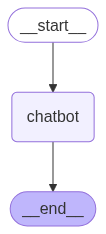

In [13]:
from IPython.display import Image,display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [14]:
while True:
  user_input=input('User: ')
  if user_input.lower() in ['quit','q']:
    print('Good Bye')
    break
  for event in graph.stream({'messages':('user',user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print('Assistant: ',value['messages'].content)

User: hello
dict_values([{'messages': AIMessage(content='Hello! 👋\n\nHow can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.001891899, 'queue_time': 0.018345061, 'total_time': 0.029164626}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--fdc4b140-ca38-4ea4-90d2-af394ad95055-0', usage_metadata={'input_tokens': 11, 'output_tokens': 15, 'total_tokens': 26})}])
content='Hello! 👋\n\nHow can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.001891899, 'queue_time': 0.018345061, 'total_time': 0.029164626}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run--fdc4b14